<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [ ]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

### Step 2: Import necessary libraries and load the dataset


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [2]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [3]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



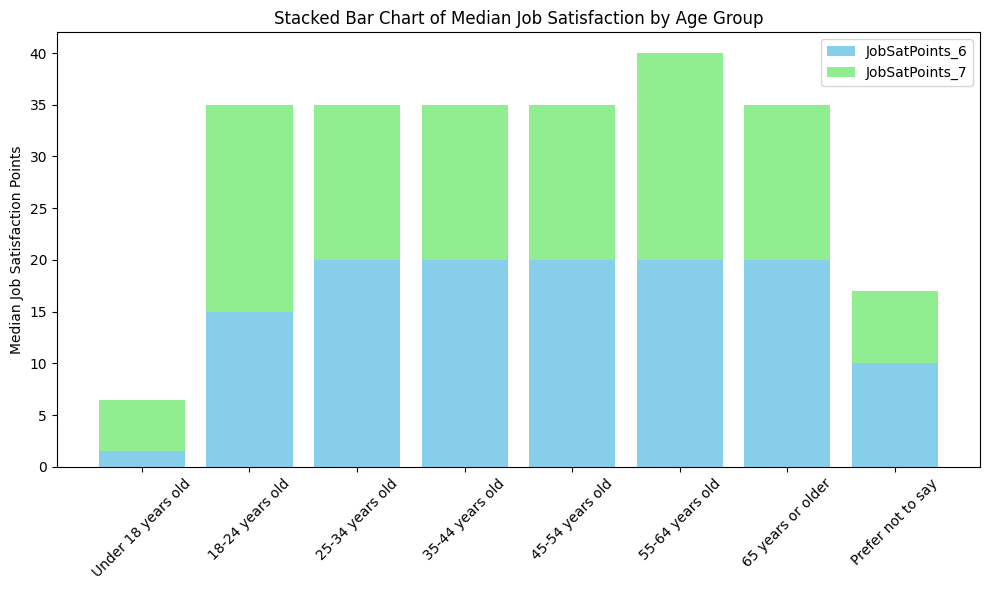

In [4]:
##Write your code here

# Step 1: Filter required columns and drop missing values
df_sat = df[['Age', 'JobSatPoints_6', 'JobSatPoints_7']].dropna()

# Step 2: Group by Age and calculate median for both satisfaction scores
median_satisfaction = df_sat.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Step 3: Sort by a logical age order (if available)
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older',
    'Prefer not to say'
]

# Ensure consistent order for plotting
median_satisfaction = median_satisfaction.reindex(age_order)

# Step 4: Plotting the stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(median_satisfaction.index, median_satisfaction['JobSatPoints_6'], label='JobSatPoints_6', color='skyblue')
plt.bar(median_satisfaction.index, median_satisfaction['JobSatPoints_7'],
        bottom=median_satisfaction['JobSatPoints_6'], label='JobSatPoints_7', color='lightgreen')

plt.xticks(rotation=45)
plt.ylabel('Median Job Satisfaction Points')
plt.title('Stacked Bar Chart of Median Job Satisfaction by Age Group')
plt.legend()
plt.tight_layout()
plt.show()


##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


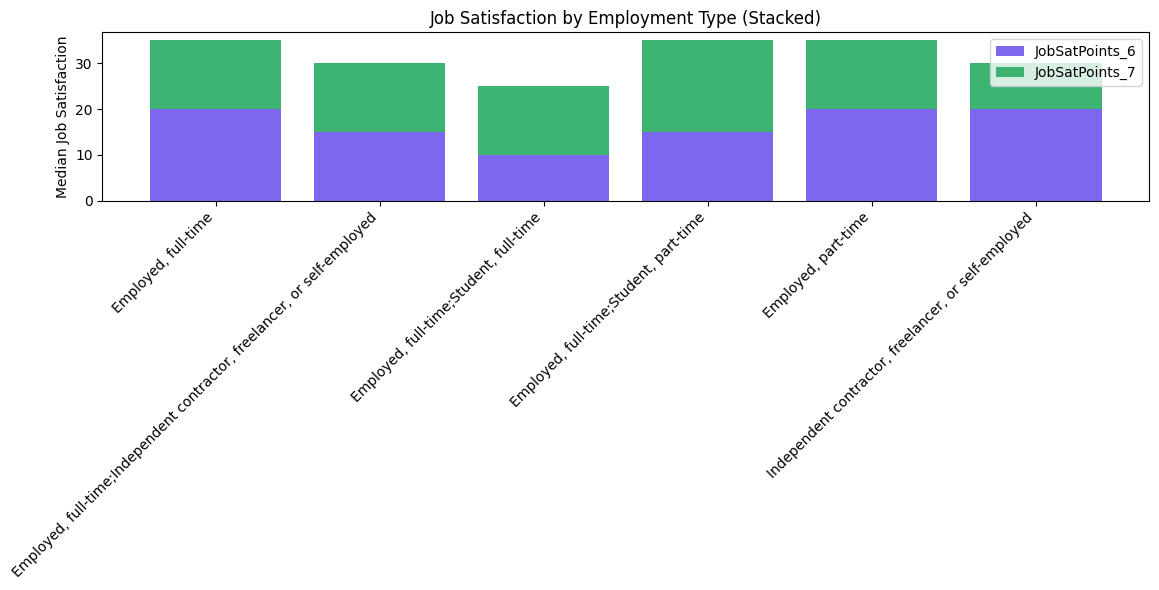

In [7]:
##Write your code here

# Step 1: Select relevant columns and drop nulls
df_filtered = df[['Employment', 'JobSatPoints_6', 'JobSatPoints_7']].dropna()

# Step 2: Select top 6 most frequent employment types
top_employment = df_filtered['Employment'].value_counts().head(6).index
df_top = df_filtered[df_filtered['Employment'].isin(top_employment)]

# Step 3: Group and calculate median satisfaction scores
grouped = df_top.groupby('Employment')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Step 4: Plot the stacked bar chart
plt.figure(figsize=(12, 6))
plt.bar(grouped.index, grouped['JobSatPoints_6'], label='JobSatPoints_6', color='mediumslateblue')
plt.bar(grouped.index, grouped['JobSatPoints_7'], 
        bottom=grouped['JobSatPoints_6'], label='JobSatPoints_7', color='mediumseagreen')

plt.xticks(rotation=45, ha='right')
plt.ylabel('Median Job Satisfaction')
plt.title('Job Satisfaction by Employment Type (Stacked)')
plt.legend()
plt.tight_layout()
plt.show()



### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


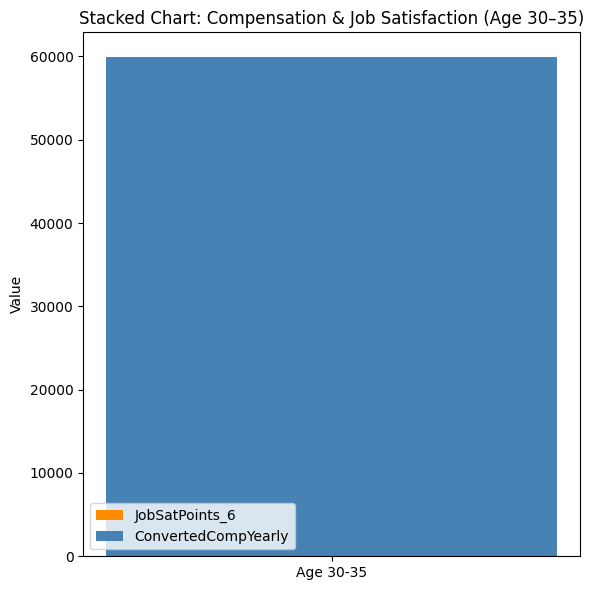

In [9]:
##Write your code here
# Step 1: Filter age group for 30-35 (within 25-34 bucket)
df_filtered = df[df['Age'] == '25-34 years old'][['ConvertedCompYearly', 'JobSatPoints_6']].dropna()

# Step 2: Calculate median values
median_comp = df_filtered['ConvertedCompYearly'].median()
median_jobsat = df_filtered['JobSatPoints_6'].median()

# Step 3: Plot stacked bar chart
plt.figure(figsize=(6, 6))
plt.bar('Age 30-35', median_jobsat, bottom=median_comp, label='JobSatPoints_6', color='darkorange')
plt.bar('Age 30-35', median_comp, label='ConvertedCompYearly', color='steelblue')


plt.ylabel('Value')
plt.title('Stacked Chart: Compensation & Job Satisfaction (Age 30–35)')
plt.legend()
plt.tight_layout()
plt.show()


##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


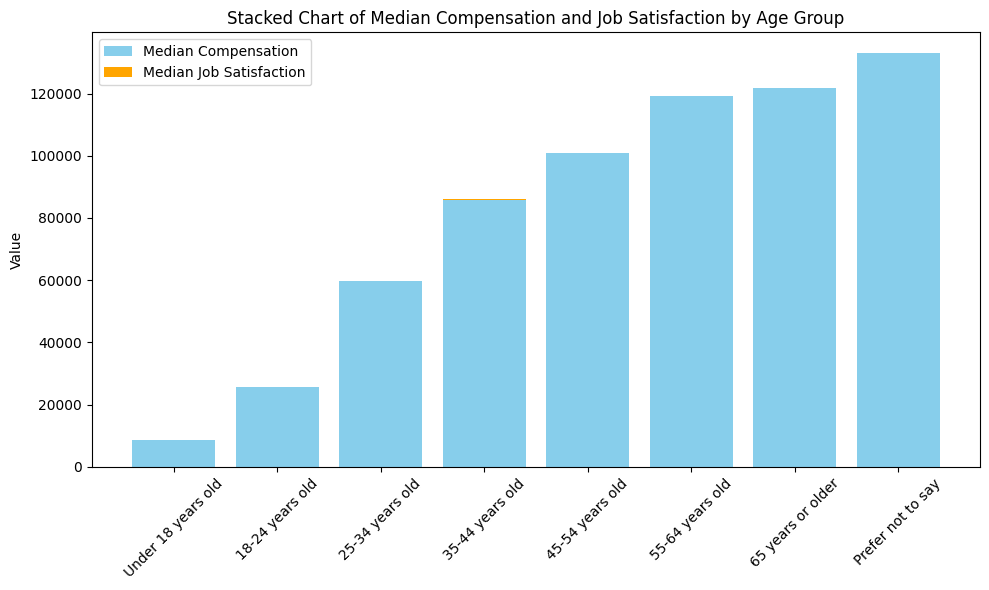

In [10]:
##Write your code here

# Step 1: Drop rows with missing values in required columns
df_clean = df[['Age', 'ConvertedCompYearly', 'JobSatPoints_6']].dropna()

# Step 2: Group by Age and calculate medians
grouped = df_clean.groupby('Age').median(numeric_only=True)[['ConvertedCompYearly', 'JobSatPoints_6']]

# Optional: Sort by age category in logical order
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old',
    '45-54 years old', '55-64 years old', '65 years or older', 'Prefer not to say'
]
grouped = grouped.reindex(age_order)

# Step 3: Plot stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(grouped.index, grouped['ConvertedCompYearly'], label='Median Compensation', color='skyblue')
plt.bar(grouped.index, grouped['JobSatPoints_6'], bottom=grouped['ConvertedCompYearly'], label='Median Job Satisfaction', color='orange')

plt.xticks(rotation=45)
plt.ylabel('Value')
plt.title('Stacked Chart of Median Compensation and Job Satisfaction by Age Group')
plt.legend()
plt.tight_layout()
plt.show()


### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


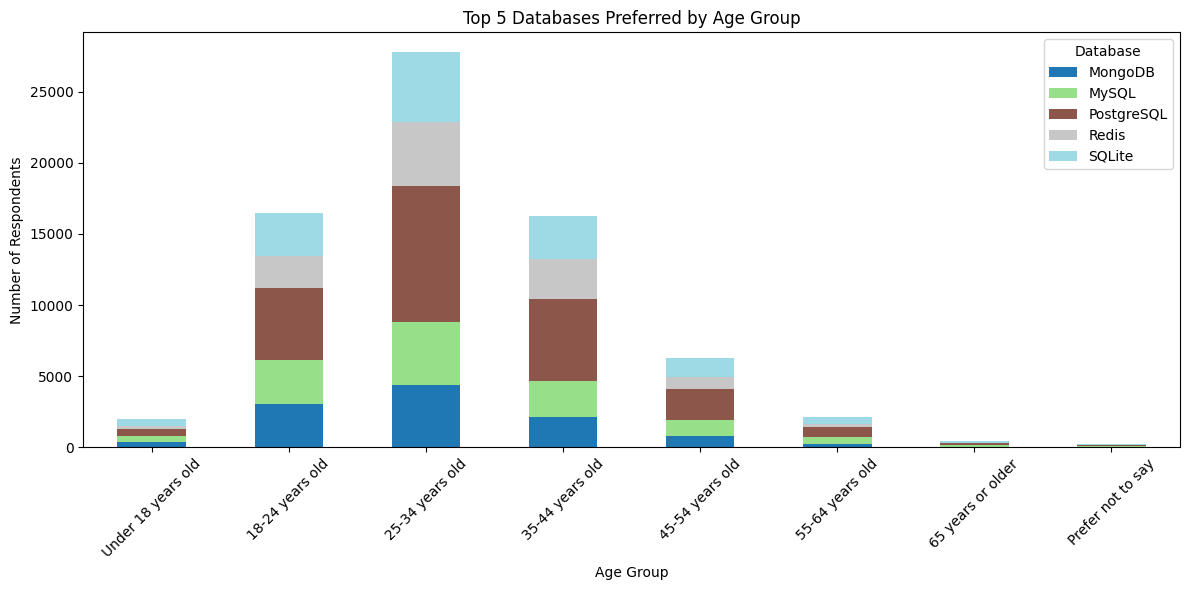

In [11]:
##Write your code here

# Step 1: Drop missing values
df_db = df[['Age', 'DatabaseWantToWorkWith']].dropna()

# Step 2: Split multiple databases into separate rows
df_db['DatabaseWantToWorkWith'] = df_db['DatabaseWantToWorkWith'].str.split(';')
df_db = df_db.explode('DatabaseWantToWorkWith')

# Step 3: Remove whitespace and drop empty
df_db['DatabaseWantToWorkWith'] = df_db['DatabaseWantToWorkWith'].str.strip()
df_db = df_db[df_db['DatabaseWantToWorkWith'] != '']

# Step 4: Get top 5 databases
top_dbs = df_db['DatabaseWantToWorkWith'].value_counts().head(5).index

# Step 5: Filter for top databases only
df_db = df_db[df_db['DatabaseWantToWorkWith'].isin(top_dbs)]

# Step 6: Group by Age and Database
db_age_group = df_db.groupby(['Age', 'DatabaseWantToWorkWith']).size().unstack(fill_value=0)

# Step 7: Optional - Reorder age categories
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old',
    '65 years or older', 'Prefer not to say'
]
db_age_group = db_age_group.reindex(age_order)

# Step 8: Plot stacked bar chart
db_age_group.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Top 5 Databases Preferred by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Database')
plt.tight_layout()
plt.show()


##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


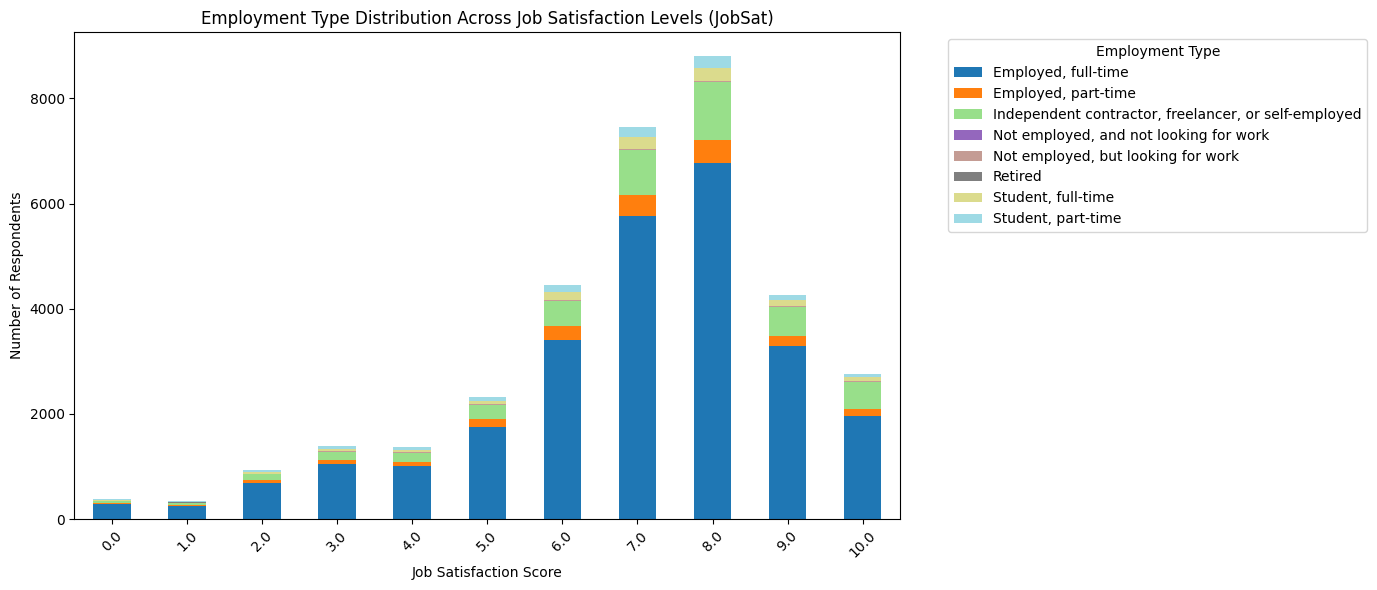

In [12]:
##Write your code here

# Step 1: Select necessary columns and remove nulls
df_emp = df[['JobSat', 'Employment']].dropna()

# Step 2: Split multiple employment types
df_emp['Employment'] = df_emp['Employment'].str.split(';')
df_emp = df_emp.explode('Employment')
df_emp['Employment'] = df_emp['Employment'].str.strip()

# Step 3: Group by JobSat and Employment
job_emp_group = df_emp.groupby(['JobSat', 'Employment']).size().unstack(fill_value=0)

# Step 4: Sort by JobSat score
job_emp_group = job_emp_group.sort_index()

# Step 5: Plot stacked bar chart
job_emp_group.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab20')
plt.title('Employment Type Distribution Across Job Satisfaction Levels (JobSat)')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


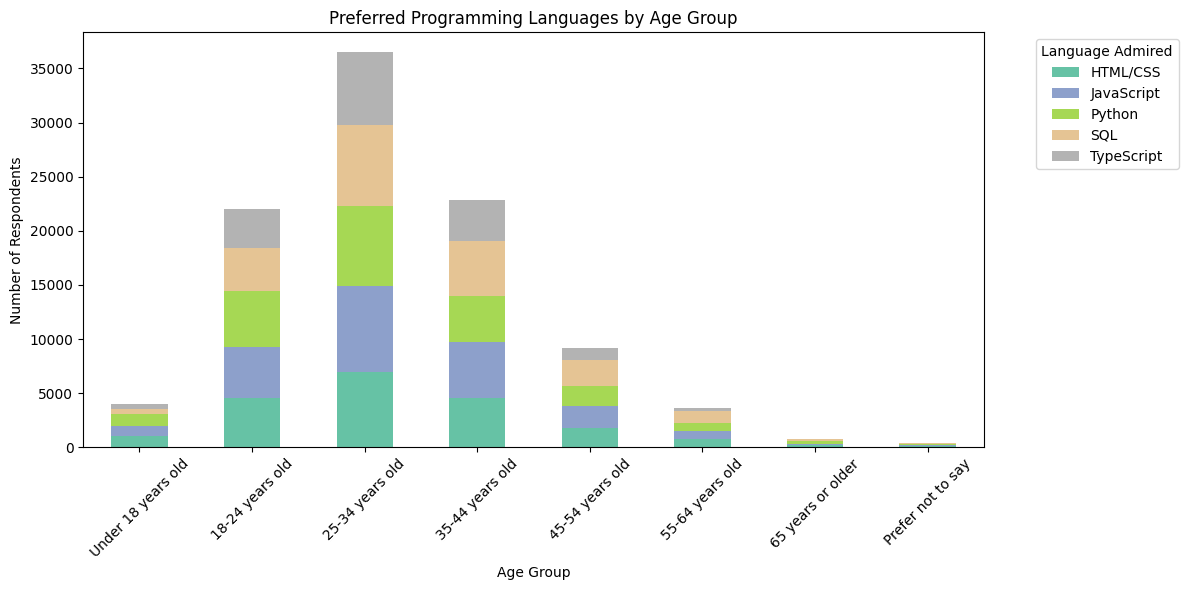

In [13]:
##Write your code here

# Step 1: Select and clean relevant columns
df_lang = df[['Age', 'LanguageAdmired']].dropna()

# Step 2: Explode multi-language responses
df_lang['LanguageAdmired'] = df_lang['LanguageAdmired'].str.split(';')
df_lang = df_lang.explode('LanguageAdmired')
df_lang['LanguageAdmired'] = df_lang['LanguageAdmired'].str.strip()

# Step 3: Filter top 5 admired languages overall
top_languages = df_lang['LanguageAdmired'].value_counts().nlargest(5).index.tolist()
df_lang = df_lang[df_lang['LanguageAdmired'].isin(top_languages)]

# Step 4: Group by Age and LanguageAdmired
lang_by_age = df_lang.groupby(['Age', 'LanguageAdmired']).size().unstack(fill_value=0)

# Step 5: Sort Age groups if needed (optional: custom order)
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old',
    '65 years or older', 'Prefer not to say'
]
lang_by_age = lang_by_age.reindex(age_order)

# Step 6: Plot stacked bar chart
lang_by_age.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title('Preferred Programming Languages by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Language Admired', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


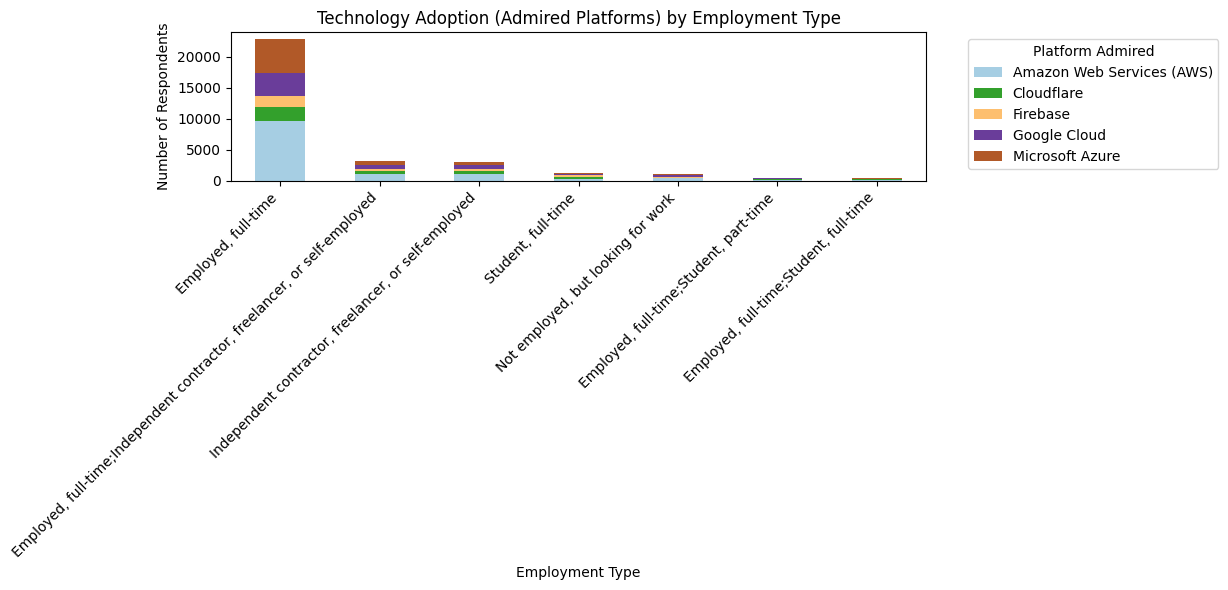

In [15]:
##Write your code here

# Filter relevant columns
df_platform = df[['Employment', 'PlatformAdmired']].dropna()

# Split semicolon-separated platform entries
df_platform['PlatformAdmired'] = df_platform['PlatformAdmired'].str.split(';')
df_platform = df_platform.explode('PlatformAdmired')
df_platform['PlatformAdmired'] = df_platform['PlatformAdmired'].str.strip()

# Get top 5 admired platforms
top_platforms = df_platform['PlatformAdmired'].value_counts().nlargest(5).index.tolist()

# Filter for top platforms
df_platform = df_platform[df_platform['PlatformAdmired'].isin(top_platforms)]

# Group by Employment and Platform
platform_by_employment = df_platform.groupby(['Employment', 'PlatformAdmired']).size().unstack(fill_value=0)

# Optional: filter to top employment types to avoid clutter
top_employment_types = df_platform['Employment'].value_counts().nlargest(7).index
platform_by_employment = platform_by_employment.loc[top_employment_types]

# Plot
platform_by_employment.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Paired')
plt.title('Technology Adoption (Admired Platforms) by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Platform Admired', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
